In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import emcee
import corner
import scipy.integrate as integrate

# Read data from .dat file

In [3]:
df = pd.read_fwf('table3.dat')

In [4]:
df.columns = ['Name', 'RAdeg', 'DEdeg', 'z','logFUV', 'e_logFUV', 'logFX', 'e_logFX', 'Group', 'gammax', 'e_gammax', 'DM', 'e_DM']

In [5]:
df

,Name,RAdeg,DEdeg,z,logFUV,e_logFUV,logFX,e_logFX,Group,gammax,e_gammax,DM,e_DM
0,030449.85-000813.4,46.20775,-0.13708,3.2960,-26.97660,0.0100,-31.23770,0.0284,1,1.988,0.29382,45.619236,0.204168
1,090508.88+305757.3,136.28702,30.96593,3.0340,-26.97250,0.0090,-31.13910,0.0241,1,2.120,0.08832,44.985864,0.174085
2,094202.04+042244.5,145.50852,4.37902,3.2840,-26.88630,0.0038,-31.32220,0.0480,1,2.113,0.16149,46.546097,0.330107
3,094734.19+142116.9,146.89251,14.35472,3.0340,-26.78020,0.0046,-31.24140,0.0274,1,1.885,0.08716,46.447673,0.205458
4,101447.18+430030.1,153.69660,43.00841,3.1220,-26.55260,0.0020,-31.31810,0.0362,1,2.206,0.16027,47.885192,0.277542
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,CFHQSJ1641+3755,250.34050,37.92228,6.0470,-28.63139,0.1900,-31.96472,0.0750,3,2.150,0.34000,43.638601,0.929413
2416,J0100+2802,15.05420,28.04053,6.3258,-27.28887,0.2000,-31.87220,0.0250,3,2.180,0.30000,48.524659,0.842906
2417,J0142-3327,25.68220,33.46264,6.3790,-27.82531,0.5000,-32.40864,0.1500,3,2.030,1.20000,49.865759,2.276221
2418,J1342+0928,205.53370,9.47739,7.5413,-28.41726,0.4400,-32.50581,0.1500,3,1.880,0.65000,48.083111,2.055734


In [6]:
logFUV = df.logFUV.to_numpy()

In [7]:
logFX = df.logFX.to_numpy()

In [8]:
z = df.z.to_numpy()
DM = df.DM.to_numpy()
err = df.e_DM.to_numpy()
e_logFUV = df.e_logFUV.to_numpy()
e_logFX = df.e_logFX.to_numpy()

# Fit $\gamma$ on small z intervals

In [9]:
z_catalog = df[(df["z"] > 3) & (df["z"] < 3.3)]

In [10]:
df.sort_values(by=['z']).tail()

,Name,RAdeg,DEdeg,z,logFUV,e_logFUV,logFX,e_logFX,Group,gammax,e_gammax,DM,e_DM
40,SDSS1030+0524,157.61292,5.41528,6.3100,-28.38109,0.10,-31.98310,0.05533,3,2.10,0.20,44.784496,0.554352
2416,J0100+2802,15.05420,28.04053,6.3258,-27.28887,0.20,-31.87220,0.02500,3,2.18,0.30,48.524659,0.842906
2417,J0142-3327,25.68220,33.46264,6.3790,-27.82531,0.50,-32.40864,0.15000,3,2.03,1.20,49.865759,2.276221
41,ULASJ1120+0641,170.00617,6.69008,7.0800,-27.24363,0.10,-31.63000,0.05928,3,2.00,0.40,47.112827,0.572492
2418,J1342+0928,205.53370,9.47739,7.5413,-28.41726,0.44,-32.50581,0.15000,3,1.88,0.65,48.083111,2.055734


In [11]:
zlogFUV = z_catalog.logFUV.to_numpy()
zlogFX = z_catalog.logFX.to_numpy()

In [12]:
m, cov= np.polyfit(zlogFUV, zlogFX, 1, cov=True)
# m, b = np.polyfit(zlogFUV, zlogFX, 1)

In [13]:
sigma = np.sqrt(np.diag(cov))

In [14]:
xmmUV = z_catalog[z_catalog['Group'] == 1].logFUV.to_numpy()
xmmX = z_catalog[z_catalog['Group'] == 1].logFX.to_numpy()
sxmmUV = z_catalog[z_catalog['Group'] == 5].logFUV.to_numpy()
sxmmX = z_catalog[z_catalog['Group'] == 5].logFX.to_numpy()
chanUV = z_catalog[z_catalog['Group'] == 6].logFUV.to_numpy()
chanX = z_catalog[z_catalog['Group'] == 6].logFX.to_numpy()

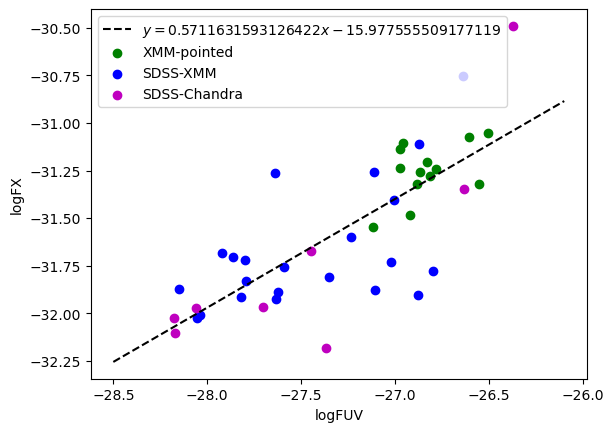

In [15]:
x = np.arange(-28.5, -26, 0.1)
plt.plot(x, m[0]*x+m[1], 'k--', label = f'$y = {m[0]}x {m[1]:+}$')
plt.scatter(xmmUV, xmmX, c ='g', label = 'XMM-pointed')
plt.scatter(sxmmUV, sxmmX, c= 'b', label = 'SDSS-XMM')
plt.scatter(chanUV, chanX, c= 'm', label = 'SDSS-Chandra')
# plt.scatter(zlogFUV, zlogFX)
plt.xlabel('logFUV')
plt.ylabel('logFX')
plt.legend()


In [16]:
FX =np.exp(logFX)
FUV =np.exp(logFUV)

In [17]:
logr = 1+DM/5
r = logr **10 #parsec

In [18]:
# LX = 4*np.pi*r**2*FX
# LUV = 4*np.pi*r**2*FUV
# x = np.arange(16, 25, 0.1)
LX = 4*np.pi*DM**2*FX
LUV = 4*np.pi*DM**2*FUV
x = np.arange(-19, -14, 0.1)

In [19]:
logLX = np.log(LX)
logLUV = np.log(LUV)

In [20]:
m1, cov= np.polyfit(logLUV, logLX, 1, cov=True)

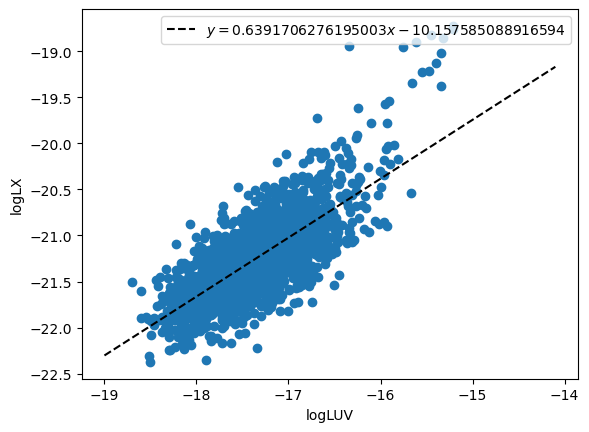

In [21]:
plt.scatter(logLUV, logLX)
plt.plot(x, m1[0]*x+m1[1], 'k--', label = f'$y = {m1[0]}x {m1[1]:+}$')
plt.xlabel('logLUV')
plt.ylabel('logLX')
plt.legend()

# Plot DM vs. z

Text(0, 0.5, 'DM')

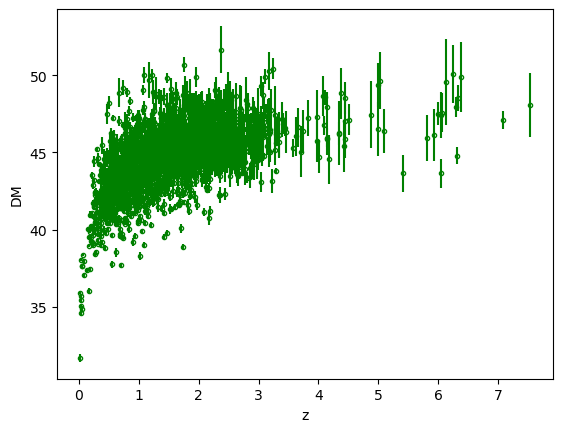

In [22]:
plt.errorbar(z, DM, yerr=err, fmt = 'o', mfc = 'none', mec = 'green', ms = 3, ecolor = 'green')
plt.xlabel('z')
plt.ylabel('DM')

In [23]:
z_line=np.linspace(0.001, 7.5, z.size)
x_line = np.log10(1+z_line)

In [24]:
om = 0.31
ol = 0.69

In [25]:
c = 299792 # km?
H0 = 70 
a1 = 1
a2 = 3/2-3/4*om
a3 = 7/6-2*om+9/8*om

In [26]:
gamma, beta = [m1[0], m1[1]]
logDl = (1/(2-2*gamma))*(gamma*logFUV-logFX)+beta
# logDl = (1/(2-2*gamma))*(gamma*logFUV-logFX+beta+(gamma-1)*np.log10(2*np.pi))
k1 = (1/(2-2*gamma))*(gamma*e_logFUV)
k2 = (1/(2-2*gamma))*e_logFX
e_logDl = np.sqrt(k1**2+k2**2)

Dl_flux = np.exp(logDl) #Calculated Dl from flux
Dl_fit1 = np.log(10)*c/H0 *(x_line + a2*x_line**2+a3*x_line**3) # Dl from fitted parameters from paper
DM_calc = 5*(np.log10(Dl_flux)+5) #calculate Distance Mod from Dl
DM_fit1 = 5*(np.log10(Dl_fit1)+5) #DM from fitted line

In [27]:
e_logDl*Dl_flux

array([  413.5789956 ,   308.17659325,   831.55984326, ...,
       11982.39007446,  7327.1929208 ,  1844.06877277])

Text(0.5, 1.0, 'Hubble diagram with parameters from papers')

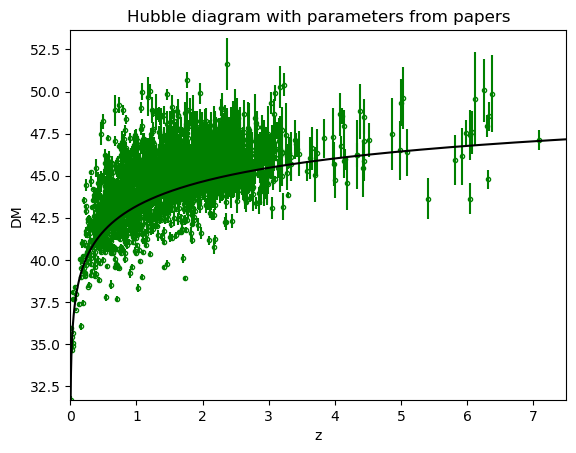

In [28]:
plt.plot(z_line, DM_fit1, c = 'k', zorder = 10)
plt.errorbar(z, DM, yerr=err, fmt = 'o', mfc = 'none', mec = 'green', ms = 3, ecolor = 'green', zorder = 0)
plt.xlabel('z') 
plt.ylabel('DM')
plt.xlim([0, 7.5])
plt.ylim([min(DM), max(DM)+2])
plt.title("Hubble diagram with parameters from papers")

Text(0.5, 1.0, 'Compare calculated DM to DM from catalog')

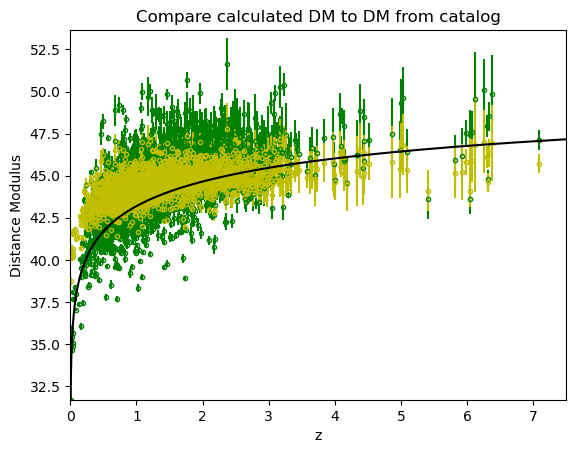

In [29]:
DM_fit = 5*(np.log10(Dl_fit1)+5)

plt.plot(z_line, DM_fit1, c = 'k', zorder = 10)
plt.errorbar(z, DM, yerr=err, fmt = 'o', mfc = 'none', mec = 'green', ms = 3, ecolor = 'green', zorder = 0)
plt.errorbar(z, DM_calc, yerr=err, fmt = 'o', mfc = 'none', mec = 'y', ms = 3, ecolor = 'y', zorder = 0)

plt.xlabel('z') 
plt.ylabel('Distance Modulus')
plt.xlim([0, 7.5])
plt.ylim([min(DM), max(DM)+2])
plt.title("Compare calculated DM to DM from catalog")

# Fitting model to Dl/log(1+z)

In [30]:
def polynomial(z, a, b):
    x = np.log10(1+z)
    dl = np.log(10)*c/H0*(x+a*x**2+b*x**3)
    DM = 5*(np.log10(dl)+5)
    return DM
#     return np.log(10)*c/H0*(x+a*x**2+b*x**3)


In [31]:
def ln_likelihood(theta, z, y, y_err):
    a, b = theta
    y_pred = polynomial(x, a, b)
    residual = y - y_pred
    weights = weight_function(x)
    weighted_residual = residual * np.sqrt(weights)
    chi2 = np.sum((weighted_residual / y_err)**2)
    ln_like = -0.5 * chi2 - 0.5 * np.sum(np.log(2 * np.pi * y_err**2))
#     delta = 0.21
#     gamma = 0.6391706
#     beta = -10.157585
#     x = np.log10(1+z)
#     Dl_mod = np.log(10)*c/H0*(x+a*x**2+b*x**3)
#     xi, yi, dx, dy = y_err
#     s2 = dy**2+gamma**2*dx**2+np.exp(2*np.log(delta))
#     psi = beta+gamma*(xi)+2*(gamma-1)*(np.log(Dl_mod))
#     ln_like = -0.5*np.sum((yi-psi)**2/s2-np.log(s2))
    return ln_like

In [32]:
def ln_prior(theta):
    a, b = theta
    # Set reasonable priors for the coefficients
#     if -10.0 < a < 10.0 and -10.0 < b < 10.0:
    if 0.0 < a < 10.0 and 0.0 < b < 10.0:
        return 0.0
    return -np.inf

In [33]:
def ln_posterior(theta, x, y, y_err):
    ln_prior_val = ln_prior(theta)
    if np.isinf(ln_prior_val):
        return ln_prior_val
    return ln_prior_val + ln_likelihood(theta, x, y, y_err)

In [34]:
def weight_function(x):
#     return 1/(0.06*np.sqrt(2*np.pi))*np.exp(-(x-0.55)**2/(2*0.06**2)) # mean = 0.55, std = 0.06
#     return 1/(1+np.exp(-20*(x-0.8))) # sigmoid function
#     return x # linear 
    return 1 # not weighted

  0%|                                                                                          | 0/1000 [00:00<?, ?it/s]/home/zzk/anaconda3/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 214.82it/s]


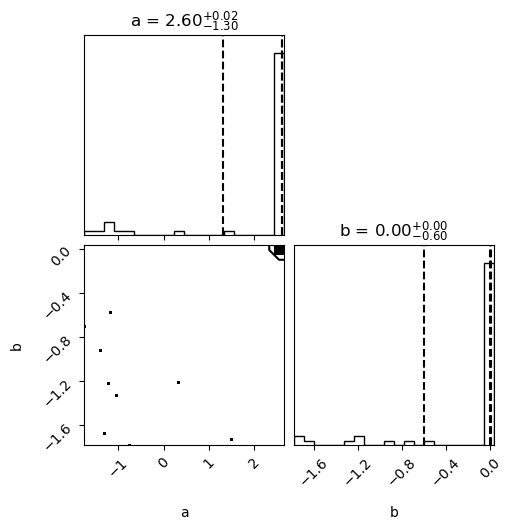

/tmp/ipykernel_510/392805381.py:4: RuntimeWarning: divide by zero encountered in log10
  DM = 5*(np.log10(dl)+5)


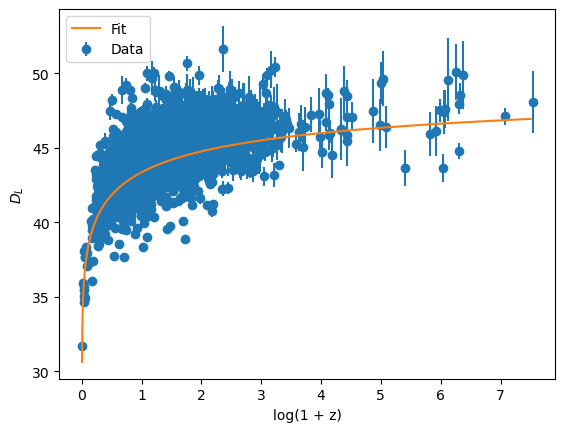

In [35]:
x_line = np.log10(1+z)
x = z
y_true = DM
e_Dl = err
y_err = err
# y_err = np.vstack((logFUV, logFX, e_logFUV, e_logFX))
y = y_true

# Initialize the MCMC sampler
ndim = 2  # Number of parameters (a and b)
nwalkers = 50  # Number of walkers (chains)
nsteps = 1000  # Number of steps in the MCMC sampling

# Initialize the walkers around a reasonable starting position
initial_pos = np.random.normal(0.0, 1.0, size=(nwalkers, ndim))

# Step 7: Run the MCMC sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, ln_posterior, args=(x, y, y_err))
sampler.run_mcmc(initial_pos, nsteps, progress=True)

# Step 8: Extract the posterior samples
burn_in = 200  # Number of burn-in samples to discard
samples = sampler.chain[:, burn_in:, :].reshape((-1, ndim))

# Step 9: Assess convergence

labels = ['a', 'b']  # Parameter labels
# Plot the corner plot
corner_fig = corner.corner(samples, labels=labels, quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 12})
plt.show()

# Step 10: Analyze the results
a_mean, b_mean = np.mean(samples, axis=0)
a_std, b_std = np.std(samples, axis=0)

# Step 11: Visualize the fit
x_plot = np.linspace(0.0, 7.5, 2420)
y_plot = polynomial(x_plot, a_mean, b_mean)

plt.errorbar(x, y, yerr=e_Dl, fmt='o', label='Data', zorder = 0)
plt.plot(x_plot, y_plot, label='Fit', zorder = 10)
plt.xlabel('log(1 + z)')
plt.ylabel('$D_L$')
plt.legend(loc='upper left')
plt.show()

/tmp/ipykernel_510/392805381.py:4: RuntimeWarning: divide by zero encountered in log10
  DM = 5*(np.log10(dl)+5)


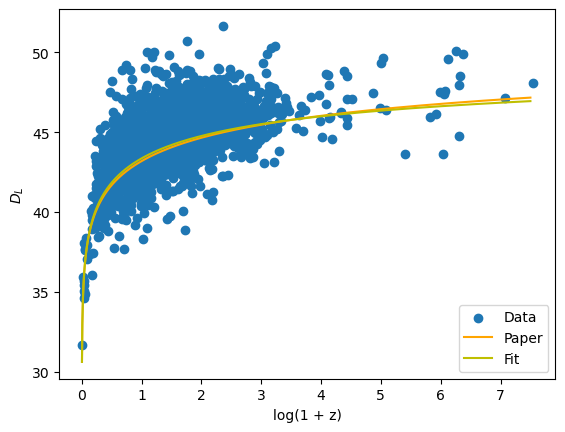

In [36]:
plt.scatter(z, DM, zorder = 0, label = 'Data')
y_plot = polynomial(x_plot, a2, a3)
plt.plot(x_plot, y_plot, label='Paper', zorder = 10, color = 'orange')
y_test = polynomial(x_plot, a_mean, b_mean)
plt.plot(x_plot, y_test, label='Fit', zorder = 20, color = 'y')
plt.xlabel('log(1 + z)')
plt.ylabel('$D_L$')
plt.legend()


In [37]:
# plt.plot(x_plot, weight_function(x_plot), label='paper', zorder = 10, color = 'orange')
# plt.title("Shape of the weight function")

In [38]:
a_mean

1.9980622042508887

In [39]:
b_mean

-0.21946341423086624

In [40]:
a2 = 3/2-3/4*om
a2

1.2675

In [41]:
a3 = 7/6-2*om+9/8*om
a3

0.8954166666666667

# Compare to Lambda-CDM model

In [42]:
def integrand(z):
    H0 = 70
    om = 0.31
    ol = 0.69
    c = 300000
    Hz = H0*np.sqrt(om*(1+z)**3+ol)
    return c/Hz

In [43]:
dL = np.zeros(len(z_line))
for i in range(len(z_line)):
    dL[i] = (1+z_line[i])*integrate.quad(integrand, 0, z_line[i])[0]
DM_model = 5*(np.log10(dL)+5)

In [44]:
z_line=np.linspace(0.001, 7.5, z.size)
x_line = np.log10(1+z_line)
Dl_fit2 = np.log(10)*c/H0 *(x_line + a_mean*x_line**2+b_mean*x_line**3) # Dl from fitted parameters
DM_fit2 = 5*(np.log10(Dl_fit2)+5) #DM from fitted Dl

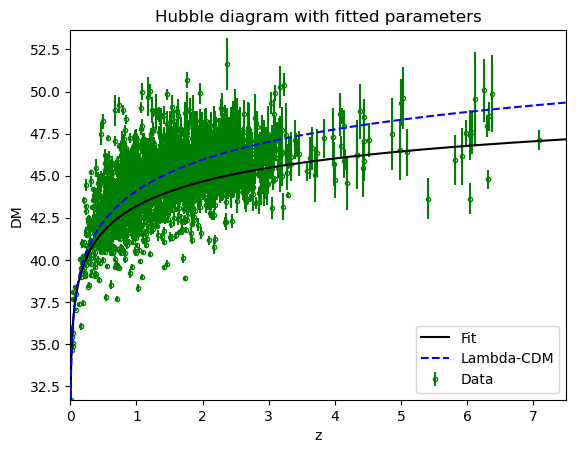

In [45]:
plt.plot(z_line, DM_fit1, c = 'k', zorder = 10, label = 'Fit')
plt.plot(z_line, DM_model, c = 'b', zorder = 20 , linestyle='dashed', label = 'Lambda-CDM')

plt.errorbar(z, DM, yerr=err, fmt = 'o', mfc = 'none', mec = 'green', ms = 3, ecolor = 'green', zorder = 0, label = 'Data')
plt.xlabel('z') 
plt.ylabel('DM')
plt.xlim([0, 7.5])
plt.ylim([min(DM), max(DM)+2])
plt.title("Hubble diagram with fitted parameters")
plt.legend()